In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model
import joblib
from tensorflow.keras.models import load_model
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('student_lifestyle_dataset.csv')

In [ ]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


Epoch 1/100


/Users/adamchen/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7.9644 - mae: 2.7864 - val_loss: 2.0723 - val_mae: 1.3550
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0717 - mae: 0.8813 - val_loss: 0.4739 - val_mae: 0.5458
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4418 - mae: 0.5252 - val_loss: 0.4130 - val_mae: 0.5077
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4287 - mae: 0.5127 - val_loss: 0.3665 - val_mae: 0.4778
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3154 - mae: 0.4443 - val_loss: 0.3345 - val_mae: 0.4599
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3425 - mae: 0.4543 - val_loss: 0.3027 - val_mae: 0.4342
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2812 - mae: 0.4155 - val_loss: 0.2755 - val_mae: 0.4141
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2514 - mae: 0.4008 - val_loss: 0.2477 - val_mae: 0.3947
Epoch 9/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

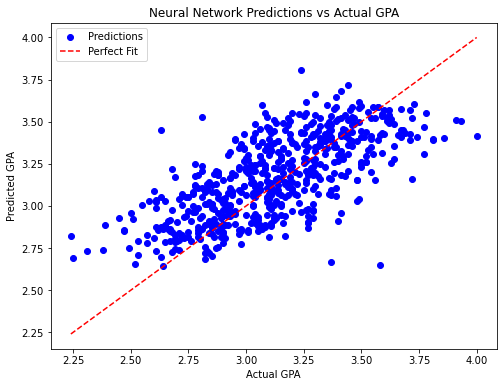

In [ ]:
X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
        'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 
        'Physical_Activity_Hours_Per_Day']].values
y = df['GPA'].values

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

#compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

#train
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    batch_size=8,
                    verbose=1)

#evaluate
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")

#make predictions
y_pred = model.predict(X_test)

#plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.xlabel('actual GPA')
plt.ylabel('predicted GPA')
plt.legend()
plt.title('Neural Network Predictions vs Actual GPA')
plt.show()


In [ ]:
X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
        'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 
        'Physical_Activity_Hours_Per_Day']].values

#create and fit the scaler
scaler = StandardScaler()
scaler.fit(X)

#saving scaler and model
joblib.dump(scaler, 'scaler.pkl')
save_model(model, 'gpa_predictor_model.h5')

In [ ]:
scaler = joblib.load("scaler.pkl")
model = load_model("gpa_predictor_model.h5")

df = pd.DataFrame({
    'Study_Hours_Per_Day': np.random.uniform(1, 5, 100),
    'Extracurricular_Hours_Per_Day': np.random.uniform(0, 3, 100),
    'Sleep_Hours_Per_Day': np.random.uniform(6, 9, 100),
    'Social_Hours_Per_Day': np.random.uniform(0, 4, 100),
    'Physical_Activity_Hours_Per_Day': np.random.uniform(0, 2, 100),
    'GPA': np.random.uniform(2.5, 3.8, 100)
})

app = Dash(__name__)

app.layout = html.Div([
    html.H1("GPA Predictor"),

    html.Div([
        html.Label("Select Variable for X-axis:"),
        dcc.Dropdown(
            id='x_axis_variable',
            options=[
                {'label': 'Study Hours Per Day', 'value': 'Study_Hours_Per_Day'},
                {'label': 'Extracurricular Hours Per Day', 'value': 'Extracurricular_Hours_Per_Day'},
                {'label': 'Sleep Hours Per Day', 'value': 'Sleep_Hours_Per_Day'},
                {'label': 'Social Hours Per Day', 'value': 'Social_Hours_Per_Day'},
                {'label': 'Physical Activity Hours Per Day', 'value': 'Physical_Activity_Hours_Per_Day'},
            ],
            value='Study_Hours_Per_Day'  # Default value
        )
    ]),

    html.Div([
        html.Label("Study Hours Per Day:"),
        dcc.Input(id='study_hours', type='number', value=2, min=0)
    ]),
    
    html.Div([
        html.Label("Extracurricular Hours Per Day:"),
        dcc.Input(id='extracurricular_hours', type='number', value=1, min=0)
    ]),
    
    html.Div([
        html.Label("Sleep Hours Per Day:"),
        dcc.Input(id='sleep_hours', type='number', value=7, min=0)
    ]),
    
    html.Div([
        html.Label("Social Hours Per Day:"),
        dcc.Input(id='social_hours', type='number', value=2, min=0)
    ]),
    
    html.Div([
        html.Label("Physical Activity Hours Per Day:"),
        dcc.Input(id='physical_activity_hours', type='number', value=1, min=0)
    ]),

    html.Button('Predict GPA', id='predict_button', n_clicks=0),

    html.H2("Predicted GPA:"),
    html.Div(id='gpa_prediction', style={'fontSize': 24}),

    html.H2("Prediction Confidence Plot"),
    dcc.Graph(id='prediction_plot')
])

@app.callback(
    [Output('gpa_prediction', 'children'),
     Output('prediction_plot', 'figure')],
    [Input('predict_button', 'n_clicks'),
     Input('x_axis_variable', 'value'),
     Input('study_hours', 'value'),
     Input('extracurricular_hours', 'value'),
     Input('sleep_hours', 'value'),
     Input('social_hours', 'value'),
     Input('physical_activity_hours', 'value')]
)
def predict_gpa(n_clicks, x_axis_variable, study_hours, extracurricular_hours, sleep_hours, social_hours, physical_activity_hours):
    user_input = np.array([[study_hours, extracurricular_hours, sleep_hours, social_hours, physical_activity_hours]])
    scaled_input = scaler.transform(user_input)

    predicted_gpa = model.predict(scaled_input)[0][0]

    variable_ranges = {
        'Study_Hours_Per_Day': np.linspace(1, 5, 50),
        'Extracurricular_Hours_Per_Day': np.linspace(0, 3, 50),
        'Sleep_Hours_Per_Day': np.linspace(6, 9, 50),
        'Social_Hours_Per_Day': np.linspace(0, 4, 50),
        'Physical_Activity_Hours_Per_Day': np.linspace(0, 2, 50)
    }
    x_values = variable_ranges[x_axis_variable]

    test_inputs = np.column_stack([
        x_values if x_axis_variable == 'Study_Hours_Per_Day' else np.full(50, study_hours),
        x_values if x_axis_variable == 'Extracurricular_Hours_Per_Day' else np.full(50, extracurricular_hours),
        x_values if x_axis_variable == 'Sleep_Hours_Per_Day' else np.full(50, sleep_hours),
        x_values if x_axis_variable == 'Social_Hours_Per_Day' else np.full(50, social_hours),
        x_values if x_axis_variable == 'Physical_Activity_Hours_Per_Day' else np.full(50, physical_activity_hours)
    ])
    scaled_test_inputs = scaler.transform(test_inputs)
    model_line_predictions = model.predict(scaled_test_inputs).flatten()

    original_points = go.Scatter(
        x=df[x_axis_variable],
        y=df['GPA'],
        mode='markers',
        marker=dict(size=8, color='gray', opacity=0.3),
        name='Original Data'
    )

    model_line = go.Scatter(
        x=x_values,
        y=model_line_predictions,
        mode='lines',
        line=dict(color='blue', width=2),
        name='Model Prediction Line'
    )

    predicted_point = go.Scatter(
        x=[user_input[0][['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day'].index(x_axis_variable)]],
        y=[predicted_gpa],
        mode='markers+text',
        marker=dict(size=12, color='red'),
        text=[f"Predicted GPA: {round(predicted_gpa, 2)}"],
        textposition="top center",
        name='Predicted GPA'
    )

    plot_layout = go.Layout(
        title="Predicted GPA with Original Data and Model Line",
        xaxis=dict(title=x_axis_variable, range=[x_values.min(), x_values.max()]),
        yaxis=dict(title="GPA", range=[2, 4]),
        showlegend=True
    )

    figure = go.Figure(data=[original_points, model_line, predicted_point], layout=plot_layout)

    return f"{round(predicted_gpa, 2)}", figure

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
